In [63]:
import datasets
from classix_m import CLASSIX_M
from sklearn.cluster import KMeans, DBSCAN, HDBSCAN, OPTICS, AgglomerativeClustering, SpectralClustering, MeanShift
from sklearn.metrics import silhouette_score
from datasets import load_dataset
import ucimlrepo
from ucimlrepo import fetch_ucirepo
import numpy as np
# data = fetch_ucirepo(name='iris')
import cv2 as cv
import time
import PIL
from PIL import Image
import umap
from classix_m import CLASSIX_M
from classix_t import CLASSIX_T
from matplotlib import pyplot as plt
from sklearn.metrics import adjusted_rand_score as ari

In [64]:
data = fetch_ucirepo(id=267)
data.data.features = data.data.features.dropna()
np.unique(np.array(data.data.targets).T[0])
x = np.array(data.data.features)
y = np.array(data.data.targets).T[0]
labels = y

In [65]:
x = umap.UMAP(n_components=2, metric='manhattan').fit_transform(x)


OWN AGGREGATION


100%|██████████| 1372/1372 [00:00<00:00, 692906.09it/s]


  aggregation time: 0.01134800910949707
  search time: 9.393692016601562e-05
  ips time: 0.0005030632019042969


100%|██████████| 20/20 [00:00<00:00, 26921.08it/s]


  merging time: 0.0017561912536621094
 minPts Merging
small clusters []


0it [00:00, ?it/s]

final cluster sizes [ 35. 531.  50. 190.  60.  24. 243. 113.  49.  77.]
[8 6 7 ... 0 1 1]
time:  0.019466876983642578


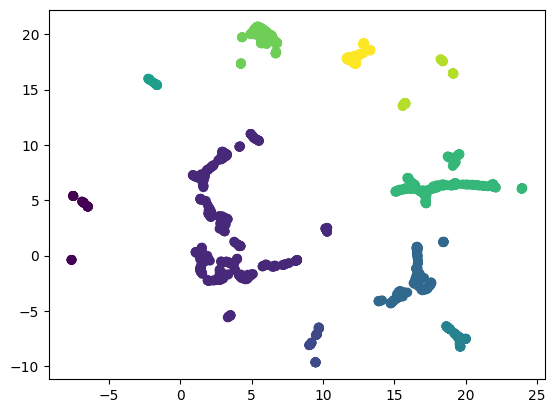

silhouette_score classix_m:  0.55302674
silhouette_score banknote_gt:  0.38170928


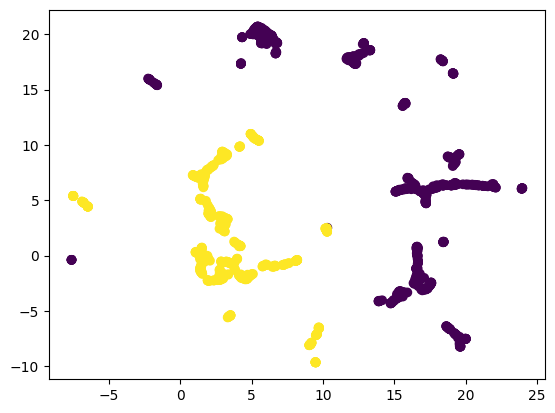

In [66]:
clx_m = CLASSIX_M(radius=0.17, minPts=20, mergeScale=1.5)
st = time.time()
clx_m.fit(x)
print("time: ", time.time() - st)
plt.scatter(x[:, 0], x[:, 1], c=clx_m.labels)
plt.show()
plt.savefig("banknote.svg", format='svg')
plt.scatter(x[:, 0], x[:, 1], c=labels)
plt.savefig("banknote_gt.svg", format='svg')
print("silhouette_score classix_m: ", silhouette_score(x, clx_m.labels))
print("silhouette_score banknote_gt: ", silhouette_score(x, labels))

time:  0.006324291229248047
silhouette_score dbscan:  0.6104102


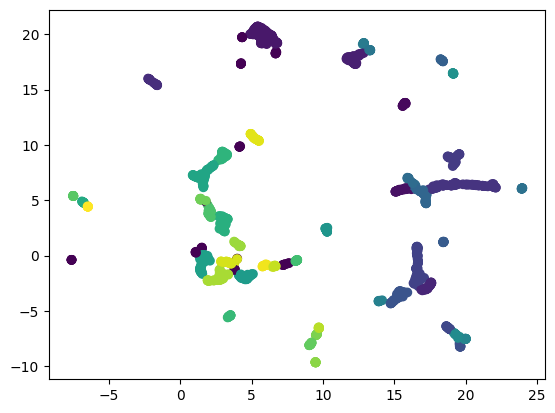

<Figure size 640x480 with 0 Axes>

In [67]:
db = DBSCAN(eps=0.5, min_samples=10, metric='manhattan')
st = time.time()
db.fit(x)
print("time: ", time.time() - st)
print("silhouette_score dbscan: ", silhouette_score(x, db.labels_))
plt.scatter(x[:, 0], x[:, 1], c=db.labels_)
plt.show()
plt.savefig("banknote_db.svg", format='svg')
# print("silhouette_score dbscan: ", silhouette_score(x, db.labels_))

silhouette_score optics:  0.41678843
time:  0.4327411651611328


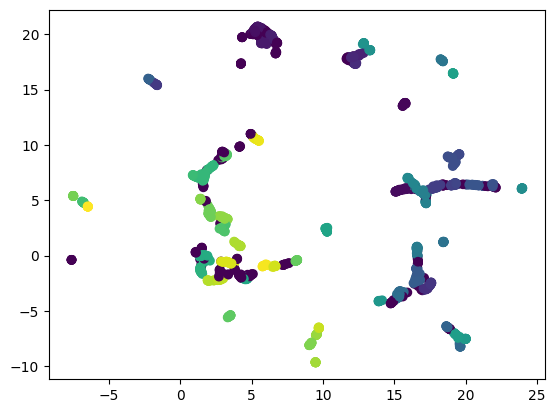

<Figure size 640x480 with 0 Axes>

In [68]:
op = OPTICS(max_eps = 0.45, min_samples=10, metric='manhattan')
st = time.time()
op.fit(x)
print("silhouette_score optics: ", silhouette_score(x, op.labels_))
print("time: ", time.time() - st)
plt.scatter(x[:, 0], x[:, 1], c=op.labels_)
plt.show()
plt.savefig("banknote_op.svg", format='svg')
# print("silhouette_score optics: ", silhouette_score(x, op.labels_))

In [70]:
print("ari classix_m: ", ari(labels, clx_m.labels))
print("ari dbscan: ", ari(labels, db.labels_))
print("ari optics: ", ari(labels, op.labels_))

ari classix_m:  0.4197144093346308
ari dbscan:  0.061501689284484524
ari optics:  0.018241633261909633


<Figure size 640x480 with 0 Axes>

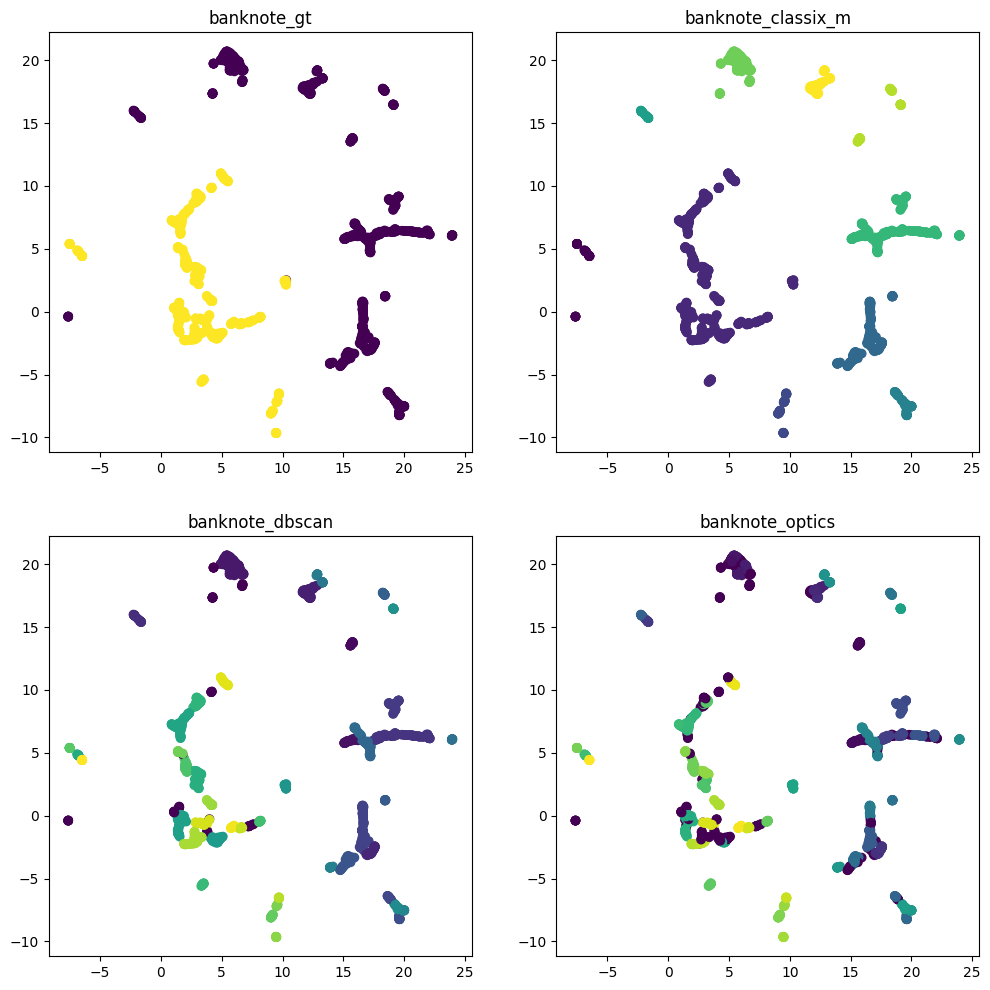

In [71]:
plt.clf()
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0,0].scatter(x[:, 0], x[:, 1], c=labels)
axes[0,0].set_title("banknote_gt")
# axes[0,0].legend()
axes[0,1].scatter(x[:, 0], x[:, 1], c=clx_m.labels)
axes[0,1].set_title("banknote_classix_m")
# axes[0,1].legend()
axes[1,0].scatter(x[:, 0], x[:, 1], c=db.labels_)
axes[1,0].set_title("banknote_dbscan")
# axes[1,0].legend()
axes[1,1].scatter(x[:, 0], x[:, 1], c=op.labels_)
axes[1,1].set_title("banknote_optics")
# axes[1,1].legend()
plt.savefig('banknote_all.svg', format='svg', bbox_inches='tight', dpi=300)